Hola **Jesua**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

In [1]:
# Solo correr en la primer ejecucion
#!pip install category-encoders
#!pip install catboost==1.2.7
#!pip install numpy==1.26.4
#!pip install lightgbm==3.3.5

In [2]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

<div class="alert alert-block alert-info">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Una buena práctica para cuando tengas que importar varias librerías es seguir el siguiente órden en las mismas:

- Primero todas las librerías que vienen ya con python cómo `datetime`, `os`, `json`, etc.
- Luego de las librerías de Python si las de terceros cómo `pandas`, `scipy`, `numpy`, etc.
- Por último, en el caso de que armes tu propio módulo en tu proyecto esto debería ir en tercer lugar, y recuerda siempre ordenar cada tipo por orden alfabético
    
Para cada sección se deben ordenar en orden alfabético
</div>

## Preparación de datos

### Dataset description

In [3]:
df = pd.read_csv('datasets/car_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
df.drop(columns=['DateCrawled', 'RegistrationMonth', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], inplace=True)

In [5]:
df = df.rename(columns={'Price': 'price', 'VehicleType': 'vehicle_type', 'RegistrationYear': 'registration_year', 'Gearbox': 'gearbox','Power': 'power', 'Model': 'model',
                        'Mileage': 'mileage', 'FuelType': 'fuel_type', 'Brand':'brand','NotRepaired':'not_repaired'})

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, siempre es ideal tener nombres en las columnas que sean más fácil de acceder, buen trabajo con el procesamiento de los nombres!
</div>

In [6]:
df.sample(10)

,price,vehicle_type,registration_year,gearbox,power,model,mileage,fuel_type,brand,not_repaired
125691,5000,wagon,2004,manual,143,c_klasse,150000,petrol,mercedes_benz,no
141013,1600,sedan,2002,manual,60,fabia,150000,petrol,skoda,no
335059,3800,sedan,2001,manual,105,3er,150000,petrol,bmw,no
132379,1999,wagon,2000,manual,163,5er,150000,gasoline,bmw,no
89339,13900,sedan,1969,auto,54,other,125000,petrol,volkswagen,no
235987,150,small,1997,manual,50,ka,125000,petrol,ford,NaN
299110,350,wagon,1998,manual,90,berlingo,5000,petrol,citroen,NaN
297473,8900,wagon,2007,manual,170,a4,150000,gasoline,audi,no
278891,3999,sedan,1999,auto,224,s_klasse,150000,petrol,mercedes_benz,no
4098,990,wagon,2002,manual,136,other,150000,petrol,citroen,no


### NaN values

In [7]:
df.isna().sum()

price                    0
vehicle_type         37490
registration_year        0
gearbox              19833
power                    0
model                19705
mileage                  0
fuel_type            32895
brand                    0
not_repaired         71154
dtype: int64

In [8]:
df['vehicle_type'] = df['vehicle_type'].fillna('Sin_dato_vt')
df['gearbox'] = df['gearbox'].fillna('Sin_dato_gb')
df['model'] = df['model'].fillna('Sin_dato_md')
df['fuel_type'] = df['fuel_type'].fillna('Sin_dato_ft')
df['not_repaired'] = df['not_repaired'].fillna('Sin_dato_nr')

In [9]:
df.isna().sum()

price                0
vehicle_type         0
registration_year    0
gearbox              0
power                0
model                0
mileage              0
fuel_type            0
brand                0
not_repaired         0
dtype: int64

##### Price - Target

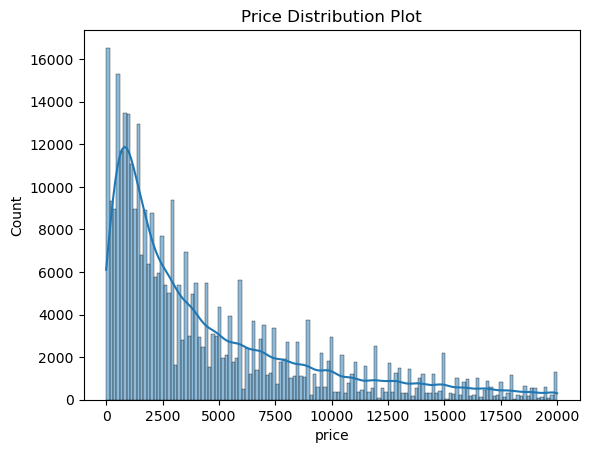

In [10]:
plt.title('Price Distribution Plot')
sns.histplot(df["price"], kde=True)
plt.show()

In [11]:
price_count = df["price"].value_counts()
print(price_count.head(50))

price
0       10772
500      5670
1500     5394
1000     4649
1200     4594
2500     4438
600      3819
3500     3792
800      3784
2000     3431
999      3364
750      3203
650      3150
4500     3053
850      2946
2200     2936
700      2936
1800     2886
900      2874
950      2793
1100     2771
1300     2757
300      2731
3000     2720
550      2591
1600     2570
5500     2543
350      2514
400      2442
1250     2441
6500     2273
1400     2253
1999     2244
250      2192
2800     2183
3200     2099
450      2040
1900     2038
1700     2030
2300     2018
1350     2011
200      1986
4000     1930
2900     1877
7500     1876
2999     1824
1450     1806
8500     1793
1950     1739
5000     1735
Name: count, dtype: int64


#### Analisis
Encontramos que hay una gran cantidad de registro con un valor del auto (price) de $0 (EU). Siendo la variable objetivo, no estamos interesados en pedir al modelo que aprenda a predecir un auto con valor 0, por lo que vamos a eliminar aquellos registros con ese valor. Se eliminaran 10772 registros

In [12]:
cero_price_mask = df['price'] == 0
df.drop(df.index[cero_price_mask], inplace=True)

##### Vehicle Type

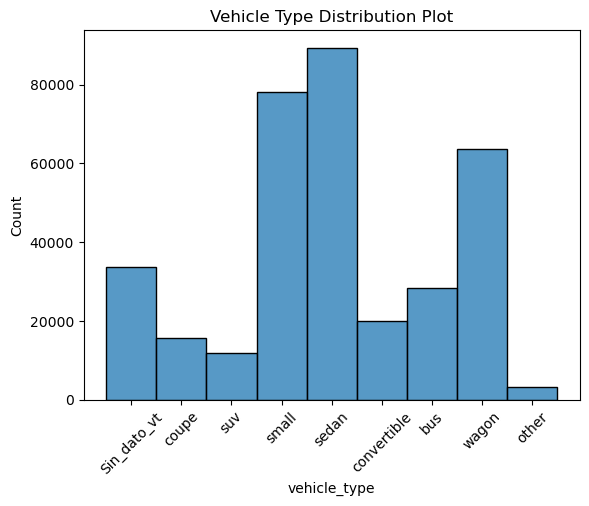

In [13]:
plt.title('Vehicle Type Distribution Plot')
ax = sns.histplot(df["vehicle_type"], kde=False)
ax.tick_params(axis='x', labelrotation = 45)
plt.show()

##### Registration Year

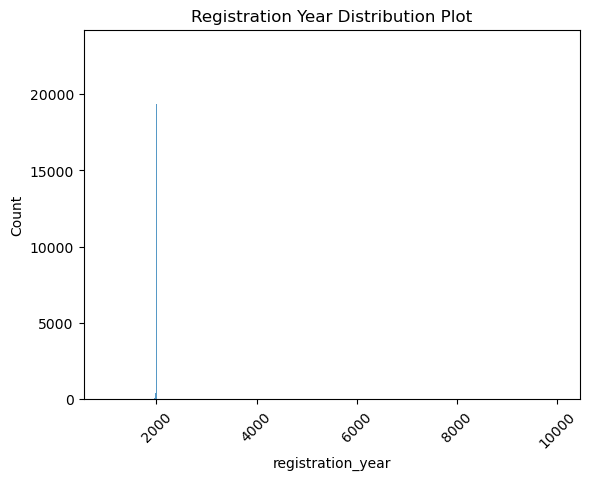

In [14]:
plt.title('Registration Year Distribution Plot')
ax = sns.histplot(df["registration_year"], kde=False)
ax.tick_params(axis='x', labelrotation = 45)
plt.show()

In [15]:
registration_year_count = df["registration_year"].value_counts()
print(registration_year_count.head(15))
#registration_years

registration_year
2000    23072
1999    21995
2005    21524
2006    19679
2001    19654
2003    19499
2004    19342
2002    18725
1998    17178
2007    17017
2008    15252
2009    14397
1997    13991
2010    10681
1996    10364
Name: count, dtype: int64


In [16]:
rev_registration_year_count = registration_year_count.iloc[::-1]
print(rev_registration_year_count.head(15))

registration_year
1946    1
2290    1
6500    1
4800    1
3800    1
3700    1
1255    1
8500    1
1400    1
5900    1
2900    1
5300    1
1949    1
2066    1
4100    1
Name: count, dtype: int64


##### Analisis

Vemos que hay algunos valores irreales para el año de registro del auto. Mi propuesta es definir un rango de año valido (1950- 2024) y todos aquellos valores fuera de ese rango que sean eliminados del dataset

In [17]:
wrong_registratrion_year_mask = (df['registration_year'] < 1950) | (df['registration_year'] > 2025)
df.drop(df.index[wrong_registratrion_year_mask], inplace=True)

##### Gearbox

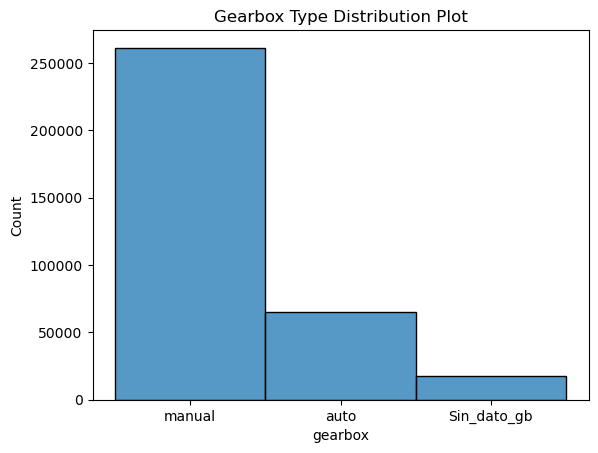

In [18]:
plt.title('Gearbox Type Distribution Plot')
sns.histplot(df["gearbox"], kde=False)
plt.show()

##### Power

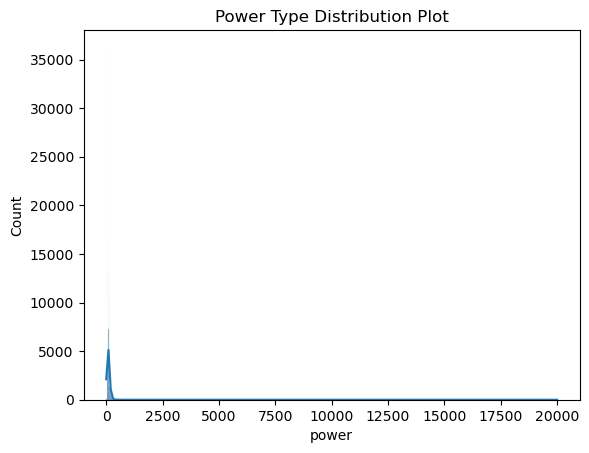

In [19]:
plt.title('Power Type Distribution Plot')
sns.histplot(df["power"], kde=True)
plt.show()

In [20]:
power_counts = df["power"].value_counts()
print(power_counts.head(10))

power
0      36180
75     23317
60     15462
150    14169
101    12960
140    12712
90     12279
116    11733
105    10243
170     9911
Name: count, dtype: int64


In [21]:
rev_power_counts = power_counts.iloc[::-1]
print(rev_power_counts.head(10))

power
1241    1
6018    1
5815    1
6006    1
2461    1
519     1
2789    1
2331    1
700     1
337     1
Name: count, dtype: int64


##### Analisis
Vemos que los valores registrados para la columna power son en muchas casos, valores irreales, siendo que los rangos de valores promedio para los autos van de los 100 a los 400 (CV), llegando a 500 en autos deportivos. Me parece que es justificado el presindir de aquellos registros con valores fuera de ese rango, se pierden 46254 registros.

In [22]:
wrong_power_mask = (df['power'] < 50) | (df['power'] > 600)
df.drop(df.index[wrong_power_mask], inplace=True)

##### Intento de remplazo de valores

##### Model

In [23]:
model_counts = df["model"].value_counts()
print(model_counts)
#registration_years

model
golf                  25970
other                 20236
3er                   17773
Sin_dato_md           11827
polo                  10204
                      ...  
samara                    5
rangerover                3
serie_3                   3
range_rover_evoque        2
601                       1
Name: count, Length: 250, dtype: int64


##### Mileage

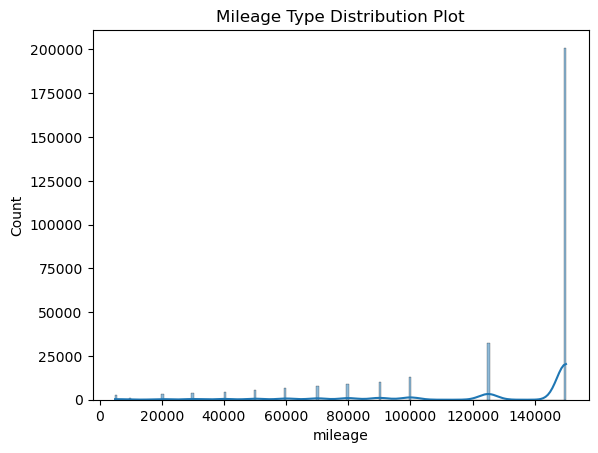

In [24]:
plt.title('Mileage Type Distribution Plot')
sns.histplot(df["mileage"], kde=True)
plt.show()

##### Fuel Type

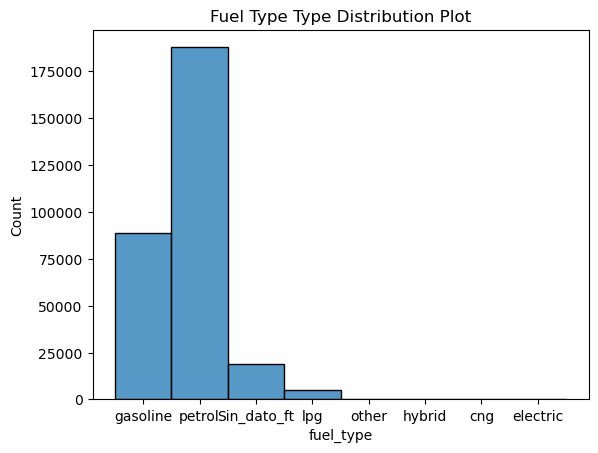

In [25]:
plt.title('Fuel Type Type Distribution Plot')
sns.histplot(df["fuel_type"], kde=False)
plt.show()

##### Brand

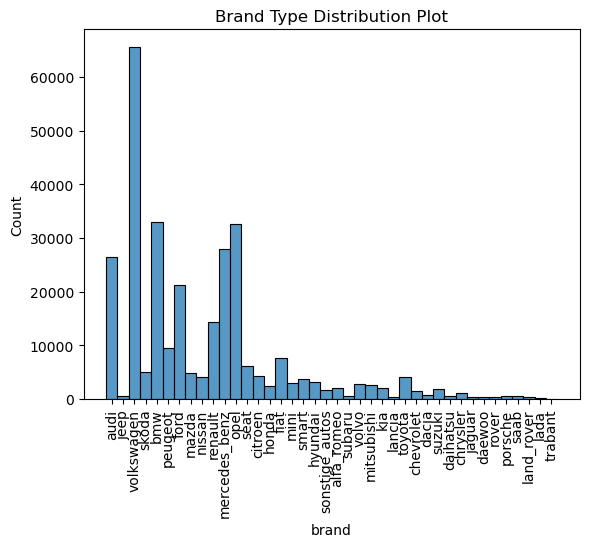

In [26]:
plt.title('Brand Type Distribution Plot')
ax = sns.histplot(df["brand"], kde=False)
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

##### Not repaired

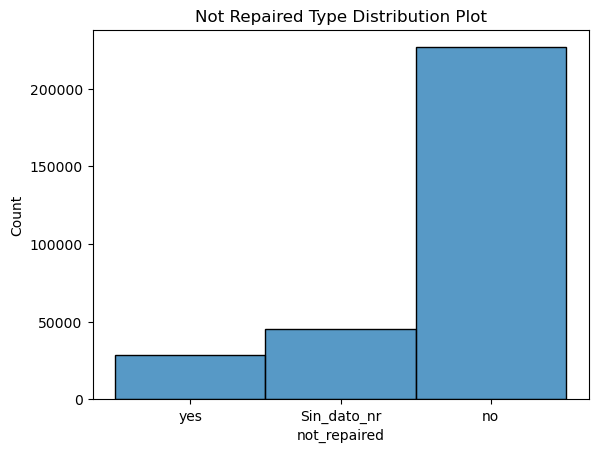

In [27]:
plt.title('Not Repaired Type Distribution Plot')
sns.histplot(df["not_repaired"], kde=False)
plt.show()

### Conclusion

Los descubrimientos mas relevantes es que hay determinadas categorias que poseen datos poco utiles debido diversos factores descritos para cada caso despues de analizarlos, por lo que decidi que los registros con estos valores atipicos se van a excluir tambien del dataset para el entrenamiento del modelo, el dataset final queda de la siguiente forma (con 301,114 registros restantes, me parece suficiente data para el entrenamiento de los modelos)

In [28]:
df.sample(10)

,price,vehicle_type,registration_year,gearbox,power,model,mileage,fuel_type,brand,not_repaired
256483,6900,sedan,2007,manual,170,c_klasse,150000,gasoline,mercedes_benz,no
324102,1150,small,1998,manual,75,polo,150000,lpg,volkswagen,no
91517,100,sedan,1997,manual,90,laguna,150000,petrol,renault,no
202938,1300,wagon,2003,manual,131,mondeo,150000,gasoline,ford,yes
304749,1150,Sin_dato_vt,2005,manual,115,mondeo,150000,Sin_dato_ft,ford,no
263532,1650,wagon,1999,manual,116,passat,150000,gasoline,volkswagen,no
30568,800,small,2002,manual,60,ka,150000,petrol,ford,no
264582,1500,small,1997,manual,54,twingo,125000,petrol,renault,no
245169,18900,convertible,2007,manual,177,z_reihe,40000,petrol,bmw,no
76846,4900,sedan,2006,manual,105,leon,90000,petrol,seat,no


### Correlation Map

<Axes: >

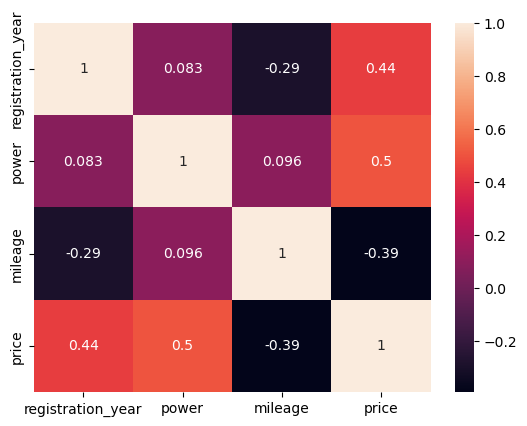

In [29]:
correlation_mtx = df.loc[:,["registration_year","power","mileage", "price"]].corr()
sns.heatmap(correlation_mtx,annot=True)

##### Analisis
Observamos que no hay una correlacion suficientemente fuerte entre las variables independientes y la variable objetivo que justifique el excluir alguna del entrenamiento

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con los procesamientos realizados a tus datos previo al entrenamiento de los mismos. Realizaste una exploración bastante detallada y bien ilustrada para cada una de tus variables
</div>

## Entrenamiento del modelo 

## Conversion de datos categoricos a numericos

##### Target Encodign

Vamos a convertir las columnas de valores categoricos a numericos para poder hacer uso de ellas en la linear regression, usando la tecnica de TargetEncoder() que nos permite remplazar un valor categorico con el promedio de la variable objetivo para los samples de esa categoria (Esto sirve si ambas variables tienen una correlacion fuerte)

In [30]:
target_encoder = ce.TargetEncoder() #creamos el obj target_encoder

In [31]:
df_encoded = df.copy()

In [32]:
# Convertimos la columna model
df_encoded['model_encoded'] = target_encoder.fit_transform(df_encoded['model'], df_encoded['price'])

# Convertimos la columna brand
df_encoded['brand_encoded'] = target_encoder.fit_transform(df_encoded['brand'], df_encoded['price'])

# Convertimos la columna vehicle_type
df_encoded['vehicle_type_encoded'] = target_encoder.fit_transform(df_encoded['vehicle_type'], df_encoded['price'])

##### One-Hot Encoding
vamos a convertir las columnas categoricas para gearbox y fuell_type con One-Hot para su uso en el entrenamiento de los modelos

In [33]:
# Convertimos la columna gearbox
df_encoded = pd.get_dummies(df_encoded, columns=['gearbox'], drop_first=True)

# Convertimos la columna fuel_type
df_encoded = pd.get_dummies(df_encoded, columns=['fuel_type'], drop_first=True)

# Convertimos la columna not_repaired
df_encoded = pd.get_dummies(df_encoded, columns=['not_repaired'], drop_first=True)

In [34]:
df_encoded.sample(5)

,price,vehicle_type,registration_year,power,model,mileage,brand,model_encoded,brand_encoded,vehicle_type_encoded,...,gearbox_manual,fuel_type_cng,fuel_type_electric,fuel_type_gasoline,fuel_type_hybrid,fuel_type_lpg,fuel_type_other,fuel_type_petrol,not_repaired_no,not_repaired_yes
285469,6990,coupe,1979,180,Sin_dato_md,90000,sonstige_autos,3767.973028,7851.851183,6414.789339,...,False,False,False,False,False,False,False,True,False,True
135420,7250,sedan,2007,143,1er,150000,bmw,10080.316943,6569.788172,4992.286902,...,False,False,False,True,False,False,False,False,True,False
334575,1750,bus,2000,101,zafira,150000,opel,3932.361027,3113.132100,5755.354915,...,True,False,False,True,False,False,False,False,True,False
103854,15999,suv,2012,163,kuga,100000,ford,14233.775244,3527.133308,9385.065652,...,False,False,False,True,False,False,False,False,True,False
86994,7200,Sin_dato_vt,2017,80,golf,150000,volkswagen,4481.418021,4831.774201,3075.709092,...,True,False,False,False,False,False,False,False,False,False


In [35]:
df.sample(5)

,price,vehicle_type,registration_year,gearbox,power,model,mileage,fuel_type,brand,not_repaired
173073,2000,sedan,2000,manual,118,3er,150000,petrol,bmw,Sin_dato_nr
78765,1500,sedan,2004,manual,75,focus,150000,petrol,ford,no
262303,550,wagon,1998,manual,190,passat,150000,petrol,volkswagen,yes
84893,4400,sedan,2008,manual,101,focus,125000,petrol,ford,no
264808,1950,sedan,2000,auto,193,passat,150000,petrol,volkswagen,no


##### Resumen

Ahora si tenemos las columnas categoricas en valores numericos para ser usandas en la regresion lineal.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo! Cuando quieras ver unos cuantos datos o una muestra de estos te recomiendo usar `head()` o `sample()` en lugar de mostrar el dataset entero
</div>

## Linear Regression

In [36]:
def linear_regression_process(cars_df):
    inicio = time.time()
    ## Declare model
    linear_model = LinearRegression()
    
    ## Select just numeric data
    cars_data = cars_df.select_dtypes(include = ["number"])
    
    ## Split Data
    target = cars_data['price']
    features = cars_data.drop('price', axis=1)
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.30, random_state=2357)

    ##Linear regression
    init = time.time()
    linear_model.fit(features_train, target_train)
    end = time.time()
    training_time = end - init
    
    r_sq = linear_model.score(features_train, target_train)
    print(f"Coefficients: {linear_model.coef_}")
    print(f"Coefficient of determination (r2 score): {r_sq}")

    ##predict
    init = time.time()
    target_predicted = linear_model.predict(features_test)
    end = time.time()
    predict_time = end - init

    ##model evaluation
    print()
    rmse = (np.sqrt(mean_squared_error(target_test, target_predicted)))
    r2 = r2_score(target_test, target_predicted)
    print("Testing performance")
    print("RMSE: {:.5f}".format(rmse))
    print("R2: {:.5f}".format(r2))

    print()
    print("Speed execution")
    print("Training: {:.5f}".format(training_time))
    print("Predicted: {:.5f}".format(predict_time))

In [37]:
linear_regression_process(df_encoded)

Coefficients: [ 2.05635715e+02  2.81610950e+01 -4.19676623e-02  4.15933083e-01
  1.90384539e-01  3.89353041e-01]
Coefficient of determination (r2 score): 0.6035352988309362

Testing performance
RMSE: 2901.40741
R2: 0.59948

Speed execution
Training: 0.01651
Predicted: 0.00200


## CatBoostRegressor Model

In [38]:
def catboost_process(cars_data, loss_func):
    inicio = time.time()
    ## Split Data
    target = cars_data['price']
    features = cars_data.drop('price', axis=1)
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.30, random_state=2357)
    
    categorical_features = [
        'vehicle_type',
        'gearbox',
        'model',
        'fuel_type',
        'brand',
        'not_repaired',
    ]

    init = time.time()
    model = CatBoostRegressor(loss_function=loss_func, iterations=150, random_seed=12345)
    model.fit(features_train, target_train, cat_features=categorical_features, verbose=10)
    end = time.time()
    training_time = end - init

    init = time.time()
    target_predicted = model.predict(features_test)
    end = time.time()
    predict_time = end - init
    
    rmse = (np.sqrt(mean_squared_error(target_test, target_predicted)))
    r2 = r2_score(target_test, target_predicted)
    print()
    print("Testing performance")
    print("RMSE: {:.5f}".format(rmse))
    print("R2: {:.5f}".format(r2))

    print()
    print("Speed execution")
    print("Training: {:.5f}".format(training_time))
    print("Predicted: {:.5f}".format(predict_time))

In [39]:
catboost_process(df, "RMSE")

Learning rate set to 0.445843
0:	learn: 3433.9481381	total: 195ms	remaining: 29.1s
10:	learn: 1934.4565616	total: 715ms	remaining: 9.04s
20:	learn: 1827.6160472	total: 1.23s	remaining: 7.56s
30:	learn: 1782.8172186	total: 1.73s	remaining: 6.65s
40:	learn: 1749.4279681	total: 2.24s	remaining: 5.95s
50:	learn: 1724.6829994	total: 2.75s	remaining: 5.33s
60:	learn: 1704.1002579	total: 3.38s	remaining: 4.93s
70:	learn: 1685.3369981	total: 3.91s	remaining: 4.35s
80:	learn: 1674.7314181	total: 4.42s	remaining: 3.76s
90:	learn: 1659.8870643	total: 4.93s	remaining: 3.19s
100:	learn: 1648.4516247	total: 5.44s	remaining: 2.64s
110:	learn: 1640.4163381	total: 5.95s	remaining: 2.09s
120:	learn: 1630.9747792	total: 6.48s	remaining: 1.55s
130:	learn: 1623.3421781	total: 6.99s	remaining: 1.01s
140:	learn: 1615.4084872	total: 7.5s	remaining: 479ms
149:	learn: 1609.2639399	total: 7.96s	remaining: 0us

Testing performance
RMSE: 1660.87417
R2: 0.86876

Speed execution
Training: 8.39588
Predicted: 0.12008


In [40]:
## MAE es menos sensible a los outliers
catboost_process(df, "MAE")

0:	learn: 3325.3216357	total: 69.2ms	remaining: 10.3s
10:	learn: 2721.0230896	total: 747ms	remaining: 9.44s
20:	learn: 2309.0838784	total: 1.45s	remaining: 8.94s
30:	learn: 2011.4504063	total: 2.09s	remaining: 8.01s
40:	learn: 1801.1637831	total: 2.84s	remaining: 7.55s
50:	learn: 1658.4720405	total: 3.48s	remaining: 6.75s
60:	learn: 1556.1753573	total: 4.16s	remaining: 6.08s
70:	learn: 1476.6245029	total: 4.9s	remaining: 5.45s
80:	learn: 1414.4376884	total: 5.57s	remaining: 4.74s
90:	learn: 1368.6241047	total: 6.2s	remaining: 4.02s
100:	learn: 1329.4958976	total: 6.83s	remaining: 3.31s
110:	learn: 1303.0528546	total: 7.45s	remaining: 2.62s
120:	learn: 1281.1511406	total: 8.09s	remaining: 1.94s
130:	learn: 1261.0803560	total: 8.72s	remaining: 1.26s
140:	learn: 1244.0769738	total: 9.36s	remaining: 597ms
149:	learn: 1233.3642657	total: 9.93s	remaining: 0us

Testing performance
RMSE: 1982.26026
R2: 0.81305

Speed execution
Training: 10.33013
Predicted: 0.12049


In [41]:
## MAE es menos sensible a los outliers
catboost_process(df, "Quantile")

0:	learn: 1662.6608179	total: 67.7ms	remaining: 10.1s
10:	learn: 1360.5115448	total: 736ms	remaining: 9.3s
20:	learn: 1154.5419392	total: 1.37s	remaining: 8.42s
30:	learn: 1005.7252032	total: 2.11s	remaining: 8.11s
40:	learn: 900.5818915	total: 2.74s	remaining: 7.29s
50:	learn: 829.2360202	total: 3.37s	remaining: 6.54s
60:	learn: 778.0876786	total: 4.03s	remaining: 5.88s
70:	learn: 738.3122515	total: 4.66s	remaining: 5.18s
80:	learn: 707.2188442	total: 5.3s	remaining: 4.52s
90:	learn: 684.3120523	total: 6.01s	remaining: 3.9s
100:	learn: 664.7479488	total: 6.64s	remaining: 3.22s
110:	learn: 651.5264273	total: 7.28s	remaining: 2.56s
120:	learn: 640.5755703	total: 7.91s	remaining: 1.9s
130:	learn: 630.5401780	total: 8.54s	remaining: 1.24s
140:	learn: 622.0384869	total: 9.2s	remaining: 587ms
149:	learn: 616.6821329	total: 9.8s	remaining: 0us

Testing performance
RMSE: 1982.26026
R2: 0.81305

Speed execution
Training: 10.19396
Predicted: 0.12559


### LightGBM Model

In [42]:
def lightgbm_process(cars_df, metric_func, rounds):
    ## Select just numeric data
    cars_data = cars_df.select_dtypes(include = ["number"])
    
    ## Split Data
    target = cars_data['price']
    features = cars_data.drop('price', axis=1)
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.30, random_state=2357)

    # Create a LightGBM dataset for training with features X_train and labels Y_train 
    train_data = lgb.Dataset(features_train, label=target_train) 
      
    # Create a LightGBM dataset for testing with features X_val and labels Y_val, 
    # and specify the reference dataset as train_data for consistent evaluation
    test_data = lgb.Dataset(features_test, label=target_test, reference=train_data) 

    # Define a dictionary of parameters for configuring the LightGBM regression model. 
    params = {
        'objective': 'regression',
        'metric': metric_func,
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.9,
    }

    # Set the number of rounds and train the model with early stopping 
    num_round = rounds
    init = time.time()
    bst = lgb.train(params, train_data, num_round, valid_sets=[test_data], early_stopping_rounds=10)

    # Create an instance of the LightGBM Regressor with the RMSE metric. 
    model = lgb.LGBMRegressor(metric=metric_func) 
      
    # Train the model using the training data. 
    model.fit(features_train, target_train)
    end = time.time()
    training_time = end - init
      
    # Make predictions on the training and validation data.
    init = time.time()
    target_predicted = model.predict(features_test)
    end = time.time()
    predict_time = end - init
    rmse = (np.sqrt(mean_squared_error(target_test, target_predicted)))
    r2 = r2_score(target_test, target_predicted)
    print()
    print("Testing performance")
    print("RMSE: {:.5f}".format(rmse))
    print("R2: {:.5f}".format(r2))
    
    print()
    print("Speed execution")
    print("Training: {:.5f}".format(training_time))
    print("predicted: {:.5f}".format(predict_time))

In [43]:
lightgbm_process(df_encoded, 'rmse', 150)

C:\Users\poroj\anaconda3\envs\data_science\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 210779, number of used features: 6
[LightGBM] [Info] Start training from score 4877.699951
[1]	valid_0's rmse: 4426.69
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 4267.69
[3]	valid_0's rmse: 4127.67
[4]	valid_0's rmse: 3986.74
[5]	valid_0's rmse: 3853.57
[6]	valid_0's rmse: 3751.33
[7]	valid_0's rmse: 3633.4
[8]	valid_0's rmse: 3527.47
[9]	valid_0's rmse: 3423.76
[10]	valid_0's rmse: 3325.36
[11]	valid_0's rmse: 3233.68
[12]	valid_0's rmse: 3150.84
[13]	valid_0's rmse: 3068.75
[14]	valid_0's rmse: 2991.56
[15]	valid_0's rmse: 2920.58
[16]	valid_0's rmse: 2862.72
[17]	valid_0's rmse: 2796.79
[18]	valid_0's rmse: 2736.14
[19]	valid_0's r

In [44]:
lightgbm_process(df_encoded, 'mape', 100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 210779, number of used features: 6
[LightGBM] [Info] Start training from score 4877.699951
[1]	valid_0's mape: 12.3275
Training until validation scores don't improve for 10 rounds
[2]	valid_0's mape: 12.1181
[3]	valid_0's mape: 11.9034
[4]	valid_0's mape: 11.7254
[5]	valid_0's mape: 11.5482
[6]	valid_0's mape: 11.4476
[7]	valid_0's mape: 11.2888
[8]	valid_0's mape: 11.1157
[9]	valid_0's mape: 10.9846
[10]	valid_0's mape: 10.8595
[11]	valid_0's mape: 10.7391
[12]	valid_0's mape: 10.6029
[13]	valid_0's mape: 10.4958
[14]	valid_0's mape: 10.39
[15]	valid_0's mape: 10.293
[16]	valid_0's mape: 10.2252
[17]	valid_0's mape: 10.1162
[18]	valid_0's mape: 10.0338
[19]	valid_0's map

C:\Users\poroj\anaconda3\envs\data_science\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[25]	valid_0's mape: 9.50497
[26]	valid_0's mape: 9.43594
[27]	valid_0's mape: 9.37723
[28]	valid_0's mape: 9.32297
[29]	valid_0's mape: 9.27069
[30]	valid_0's mape: 9.22731
[31]	valid_0's mape: 9.18021
[32]	valid_0's mape: 9.14523
[33]	valid_0's mape: 9.09778
[34]	valid_0's mape: 9.05503
[35]	valid_0's mape: 9.01912
[36]	valid_0's mape: 8.98267
[37]	valid_0's mape: 8.94571
[38]	valid_0's mape: 8.91168
[39]	valid_0's mape: 8.87583
[40]	valid_0's mape: 8.85158
[41]	valid_0's mape: 8.81112
[42]	valid_0's mape: 8.78524
[43]	valid_0's mape: 8.7605
[44]	valid_0's mape: 8.73419
[45]	valid_0's mape: 8.70767
[46]	valid_0's mape: 8.67056
[47]	valid_0's mape: 8.64788
[48]	valid_0's mape: 8.62687
[49]	valid_0's mape: 8.60089
[50]	valid_0's mape: 8.5771
[51]	valid_0's mape: 8.55991
[52]	valid_0's mape: 8.53101
[53]	valid_0's mape: 8.51276
[54]	valid_0's mape: 8.49573
[55]	valid_0's mape: 8.48345
[56]	valid_0's mape: 8.4594
[57]	valid_0's mape: 8.44082
[58]	valid_0's mape: 8.42309
[59]	valid_0's ma

In [45]:
lightgbm_process(df_encoded, 'poisson', 120)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 210779, number of used features: 6
[LightGBM] [Info] Start training from score 4877.699951
[1]	valid_0's poisson: -36388
Training until validation scores don't improve for 10 rounds
[2]	valid_0's poisson: -36522.4
[3]	valid_0's poisson: -36633.5
[4]	valid_0's poisson: -36739.6
[5]	valid_0's poisson: -36834.4
[6]	valid_0's poisson: -36905.2
[7]	valid_0's poisson: -36983
[8]	valid_0's poisson: -37050.2
[9]	valid_0's poisson: -37114
[10]	valid_0's poisson: -37172.1
[11]	valid_0's poisson: -37224.8
[12]	valid_0's poisson: -37271.6
[13]	valid_0's poisson: -37316.4
[14]	valid_0's poisson: -37357.5
[15]	valid_0's poisson: -37394.4
[16]	valid_0's poisson: -37424.5
[17]	valid_0's 

C:\Users\poroj\anaconda3\envs\data_science\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[28]	valid_0's poisson: -37684.4
[29]	valid_0's poisson: -37697.3
[30]	valid_0's poisson: -37709.1
[31]	valid_0's poisson: -37720
[32]	valid_0's poisson: -37729.8
[33]	valid_0's poisson: -37739.3
[34]	valid_0's poisson: -37748.3
[35]	valid_0's poisson: -37756.5
[36]	valid_0's poisson: -37764.6
[37]	valid_0's poisson: -37771.4
[38]	valid_0's poisson: -37778
[39]	valid_0's poisson: -37784.3
[40]	valid_0's poisson: -37790.3
[41]	valid_0's poisson: -37796
[42]	valid_0's poisson: -37800.9
[43]	valid_0's poisson: -37805.6
[44]	valid_0's poisson: -37809.9
[45]	valid_0's poisson: -37813.8
[46]	valid_0's poisson: -37818.6
[47]	valid_0's poisson: -37822.2
[48]	valid_0's poisson: -37826
[49]	valid_0's poisson: -37829.2
[50]	valid_0's poisson: -37832.4
[51]	valid_0's poisson: -37835.3
[52]	valid_0's poisson: -37838.5
[53]	valid_0's poisson: -37841.5
[54]	valid_0's poisson: -37844.2
[55]	valid_0's poisson: -37846.3
[56]	valid_0's poisson: -37848.8
[57]	valid_0's poisson: -37851
[58]	valid_0's poiss

## Análisis del modelo

La siguiente tabla muestra los parametros obtenidos para los modelos usados, observamos que pudimos obtener un mejor rendimiento para ambos modelos explorados comparados con la regresión lineal simple

| Modelo              | Score      | Mesurement | Score   | Mesurement | training-Time | prediction-Time |
|---------------------|------------|------------|---------|------------|---------------|-----------------|
| Linear Regression   | 2901.40741 | RMSE       | 0.59948 | r2         | 0.02351       | 0.00405         |
| CatBoost (RMSE)     | 1660.87417 | RMSE       | 0.86876 | r2         | 13.23528      | 0.25954         |
| CatBoost (MAE)      | 1982.26026 | RMSE       | 0.81305 | r2         | 16.17395      | 0.26189         |
| CatBoost (Quantile) | 1982.26026 | RMSE       | 0.81305 | r2         | 16.18964      | 0.29023         |
| LightGBM (RMSE)     | 1758.61228 | RMSE       | 0.85285 | r2         | 1.34809       | 0.06127         |
| LightGBM (MAPE)     | 1758.61228 | RMSE       | 0.85285 | r2         | 1.21587       | 0.08700         |
| LightGBM (Poisson)  | 1758.61228 | RMSE       | 0.85285 | r2         | 1.17925       | 0.06528         |

Vemos que el mejor resultado obtenido es con el modelo de CatBoost usando el RMSE como funcion de perdida. Probablemente es el mejor modelo por la posibilidad que nos da de usar los datos categoricos dentro de la evaluación lo que permite que no haya una perdida de la influencia de los datos en la variable objetivo. Sin embargo, debemos señalar que este modelo tambien es el más lento en el proceso de **entrenamiento** con 13.23 seg, aunque considero que en el orden de las decenas de segundos, aun podemos entender este modelos como viable.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con los entrenamientos de los modelos y la exploración de tus datos, hiciste muy bien cada proceso.

Sin embargo, si revisamos la descripción del proyecto y lo que le interesa a la empresa parte del trabajo es medir los tiempos para predicción **y** entrenamiento, deberías calcular cuanto tiempo le toma al modelo entrenar y cuanto le toma hacer una predicción, esto lo puedes hacer con la librería time de python. Es importante que para tus conclusiones consideres cuanto tiempo tarda en hacer la predicción el modelo y cómo se encuentra su métrica de desempeño para que escojas el mejor en base al balance de esas dos variables. Esto es importante porque cuando se quiere utilizar el modelo en un ambiente productivo para que sea usado por usuarios esto se suele hacer a través de un API donde los tiempos de respuesta son importantes por lo que el modelo más rápido ayudará
</div>

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [ ]  El código no tiene errores- [ ]  Las celdas con el código han sido colocadas en orden de ejecución- [ ]  Los datos han sido descargados y preparados- [ ]  Los modelos han sido entrenados
- [ ]  Se realizó el análisis de velocidad y calidad de los modelos